In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

########################
USE_OR = False
USE_NOR = False
USE_XOR = False
USE_XNOR = False
USE_AND = False
USE_DISCRETE = False
USE_RANDOM = True

In [16]:
class ImageObject:
    
    def __init__(self, size_h, size_v, zero_p):
        self.size_h = size_h
        self.size_v = size_v
        self.img = (np.random.random((size_h,size_v)) > (zero_p/100.0)).astype(int)
        self.error = 0
        
    def show(self):
        plt.imshow(self.img,cmap='Greys_r')
        
    def set_error(self,cvimage):
        self.error = sum(sum(abs(cvimage-self.img)))
        
    def get_error(self):
        return self.error

In [17]:
def create_new_population(size, size_h, size_v, zero_p, cvimage):
    population = []
    for i in range(size):
        img = ImageObject(size_h,size_v,zero_p)
        if(not already_in(img,population)):
            img.set_error(cvimage)
            population.append(img)
    return population

In [18]:
def crossover(img1, img2):
    
    randomSelection = 0 
    new_img = ImageObject(img1.img.shape[0],img1.img.shape[1],100)
    
    #Random
    if USE_RANDOM:
        randomSelection = random.randint(1,60)
        
    #OR
    if USE_OR or (randomSelection >= 1 and randomSelection < 10) :
        new_img.img = cv2.bitwise_or(img2.img, img1.img, mask = None)
        #print('OR')
    
    #NOR
    if USE_NOR or (randomSelection >= 10 and randomSelection < 20) :
        new_img.img = cv2.bitwise_not(cv2.bitwise_or(img2.img, img1.img, mask = None),None)
        #print('NOR')

    #XOR
    if USE_XOR or (randomSelection >= 20 and randomSelection < 30) :
        new_img.img = cv2.bitwise_xor(img2.img, img1.img, mask = None)
        #print('XOR')
        
    #XNOR
    if USE_XNOR or (randomSelection >= 30 and randomSelection < 40) :
        new_img.img = cv2.bitwise_not(cv2.bitwise_xor(img2.img, img1.img, mask = None),None)
        #print('XNOR')
    
    #AND
    if USE_AND or (randomSelection >= 40 and randomSelection < 50) :
        new_img.img = cv2.bitwise_and(img2.img, img1.img, mask = None)
        #print('XNOR')
        
    #DISCRETE
    if USE_DISCRETE or (randomSelection >= 50 and randomSelection < 60) :
        #print('Discrete')
        for i in range(img1.img.shape[0]):
            for j in range(img1.img.shape[1]):
                new_img.img[i][j] = img1.img[i][j] if random.randint (1,100) > 0.5 else img2.img[i][j]

    return new_img
            

In [19]:
def mutation(img,mut_p):
    height = img.img.shape[1]
    width = img.img.shape[0]
    new_img = ImageObject(width,height,100)
    new_img.img = np.copy(img.img)
    for i in range(int((height*width*mut_p)/100)):
        randIndex_h = random.randint(0,width-1)
        randIndex_v = random.randint(0,height-1)
        new_img.img[randIndex_h][randIndex_v] = not new_img.img[randIndex_h][randIndex_v]
    return new_img
        

In [20]:
def already_in(new_img, population):
    return next((True for elem in population if np.array_equal(elem.img, new_img.img)), False)


In [21]:
def select_candidates(population, size):
    population.sort(key = lambda x: x.error, reverse=False)
    return population[0:size]

In [22]:
def next_generation(population, size, mutation_p, cvimage):
    new_population = population
    while(len(new_population)<size):
        if (random.randint (1,100) > mutation_p):
            # do crossover 
            img1 = random.choice(new_population)
            img2 = random.choice(new_population)
            new_img = crossover(img1, img2)
            if(not already_in(new_img,new_population)):
                new_img.set_error(cvimage)
                new_population.append(new_img)
        
        else:
            # do mutation
            img = random.choice(new_population)
            new_img = mutation(img,10)
            if(not already_in(new_img,new_population)):
                new_img.set_error(cvimage)
                new_population.append(new_img)
            
    return new_population

In [44]:
def controller():
    
    img_path = 'test2.png'
    orig_img = cv2.imread(img_path, 0)
    orig_img = orig_img/255.0
    orig_img = orig_img.astype(int)
    size_h = orig_img.shape[0]
    size_v = orig_img.shape[1]
    
    
    population_size = 100
    intermidiate_size = 200
    zero_p = 10
    mutation_p = 15
    no_of_generations = 100000
    
    fig = plt.figure()
    plt.imshow(orig_img, cmap="Greys_r" )
        
    population = create_new_population(population_size, size_h, size_v, zero_p, orig_img)

    for i in range(no_of_generations):    
        next_gen = next_generation(population, intermidiate_size, mutation_p, orig_img)
        population = select_candidates(next_gen, population_size)
        #print(i)
        #sys.stdout.flush()
        
        
    for i in range(10):
        print(population[i].error)
        fig = plt.figure()
        population[i].show()
    print(np.array_equal(population[0].img,population[1].img))

48
49
49
49
49
49
49
49
49
49
False


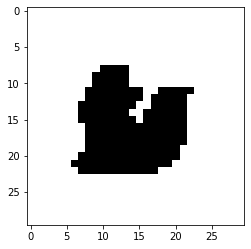

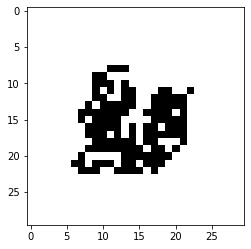

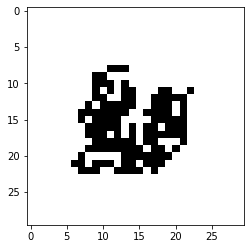

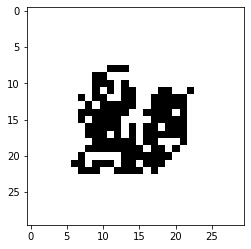

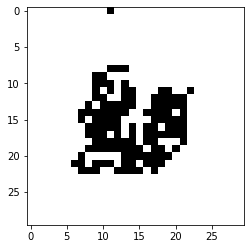

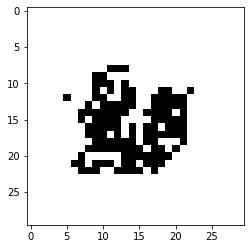

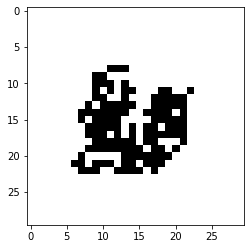

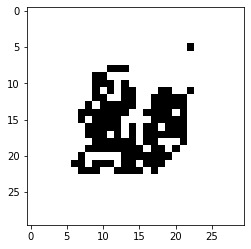

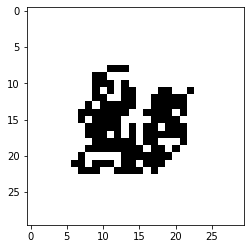

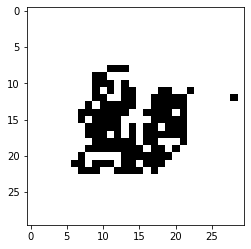

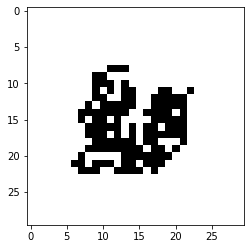

In [45]:
controller()

In [25]:
a = []
b = np.array([1,2,3,4,5])
c = np.array([1,2,3,4,5])
a.append(b)


In [26]:
print (np.array_equal(population[0],population[1]))

NameError: name 'population' is not defined

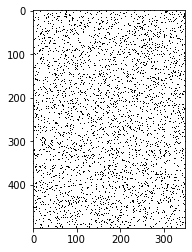

In [35]:
abc = ImageObject(500,350,10)
abc.show()